# Title: Machine Learning
# Author: Kamalini Pradhan
# [GIthub link](https://github.com/S573647/datafun-07-ML)

## Import All the Libraries needed 

In [64]:
# Standard library imports
import os
import sys

# Third-party library imports
import numpy as np
import pandas as pd
import pyarrow
import matplotlib
import seaborn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1: Chart a Straight Line

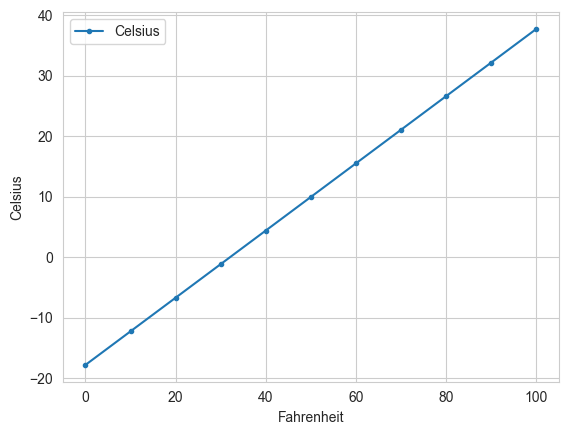

In [65]:
import pandas as pd

c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2: Predict Avg High Temp in NYC in January using scipy

### Section 1 - Data Acquisition 
### Loading the Average High Temperature in NYC in Jan  data into a DataFrame

In [66]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [67]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.50,-1.90
120,201501,36.10,-1.30
121,201601,40.80,3.40
122,201701,42.80,5.40
123,201801,38.70,1.30


### Section 3 - Data Cleaning

In [68]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)


,Date,Temperature,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90


### Truncate the last two digits of the date column

In [69]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.20,-3.20
1,1896,34.70,-2.70
2,1897,35.50,-1.90


### Section 4 - Descriptive Statistics
### Calculating Basic Descriptive Statistics for the Dataset

In [70]:
pd.set_option('display.float_format', '{:.2f}'.format)
nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


### Section 5 - Build the Model

In [71]:
from scipy import stats
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope
linear_regression.intercept

8.694993233674289

### Section 6 - Predict
### Forecasting Future January Average High Temperatures

In [72]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations
### Plotting the Average High Temperatures and a Regression Line

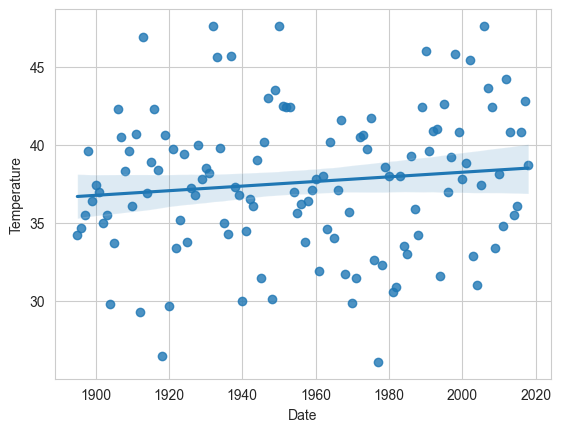

In [73]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)


## Part 3: Predict Avg High Temp in NYC in January using Scikit Learn

### Section 1 - Build the Model

In [74]:
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), 
nyc_df.Temperature.values,
random_state=11)


### Shape of Training data set

In [75]:
X_train.shape

(93, 1)

### Shape of Testing data set

In [76]:
X_test.shape

(31, 1)

### Build a Linear Regression Model

In [77]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

### Display Coefficient 

In [78]:
linear_regression.coef_

array([0.01939167])

### Display intercept

In [79]:
linear_regression.coef_

array([0.01939167])

### Section 2 - Test the Model

In [80]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')


predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3: Predict 

In [81]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

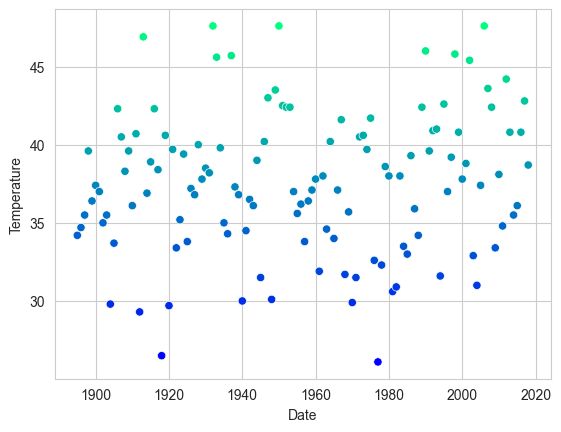

In [82]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
hue='Temperature', palette='winter', legend=False)